In [1]:
# Se cargan las librerias necesarias para hacer la guia 3.
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import sklearn as skl
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.linear_model import SGDClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler


1Ô∏è‚É£ Preprocesamiento (EDA b√°sico)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9660\1478363150.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=valores_nulos.index,y=valores_nulos.values,palette="coolwarm")


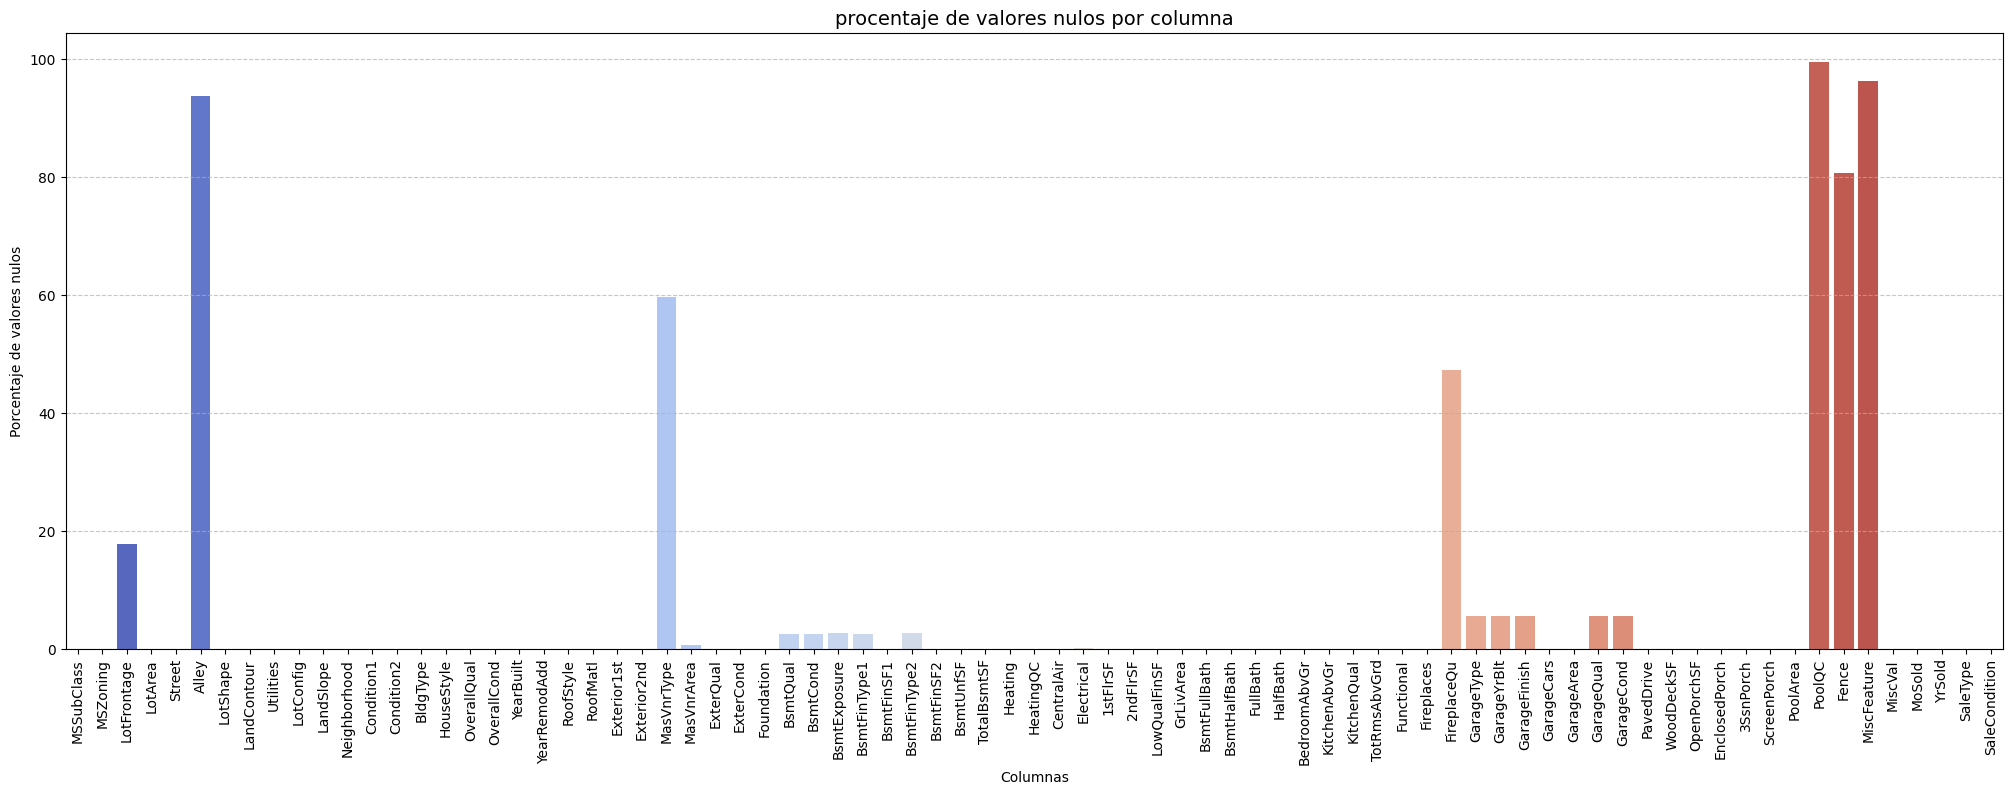

In [2]:
#1Ô∏è‚É£ Preprocesamiento (EDA b√°sico)
#Cargar el dataset y visualizar las primeras filas (df.head()).


#print(df.head())

df = pd.read_csv("C:\\Users\\Lenovo\\Documents\\Machine learning 1\\Guia 3\\train.csv") 

#Identificar tipos de variables y valores nulos (df.info(), df.isnull().sum()).

print(df.info())


#print(f"Estos son los valores nulos \n\n {df.isnull().sum()}")

#Eliminar o imputar nulos (justificando la estrategia).

df = df.drop(columns=["Id","SalePrice"])

print(df.head())

print(f"Estos son los valores nulos \n\n {df.isnull().sum() / len(df) * 100}")

# Calcular el porcentaje de valores nulos
valores_nulos = (df.isnull().sum() / len(df)) * 100

plt.figure(figsize=(25,8))
sns.barplot(x=valores_nulos.index,y=valores_nulos.values,palette="coolwarm")
# Personalizar el gr√°fico
plt.title("procentaje de valores nulos por columna", fontsize=14)
plt.xlabel("Columnas")
plt.ylabel("Porcentaje de valores nulos")
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.7)
# Mostrar el gr√°fico
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9660\706597017.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=valores_nulos.index,y=valores_nulos.values,palette="coolwarm")


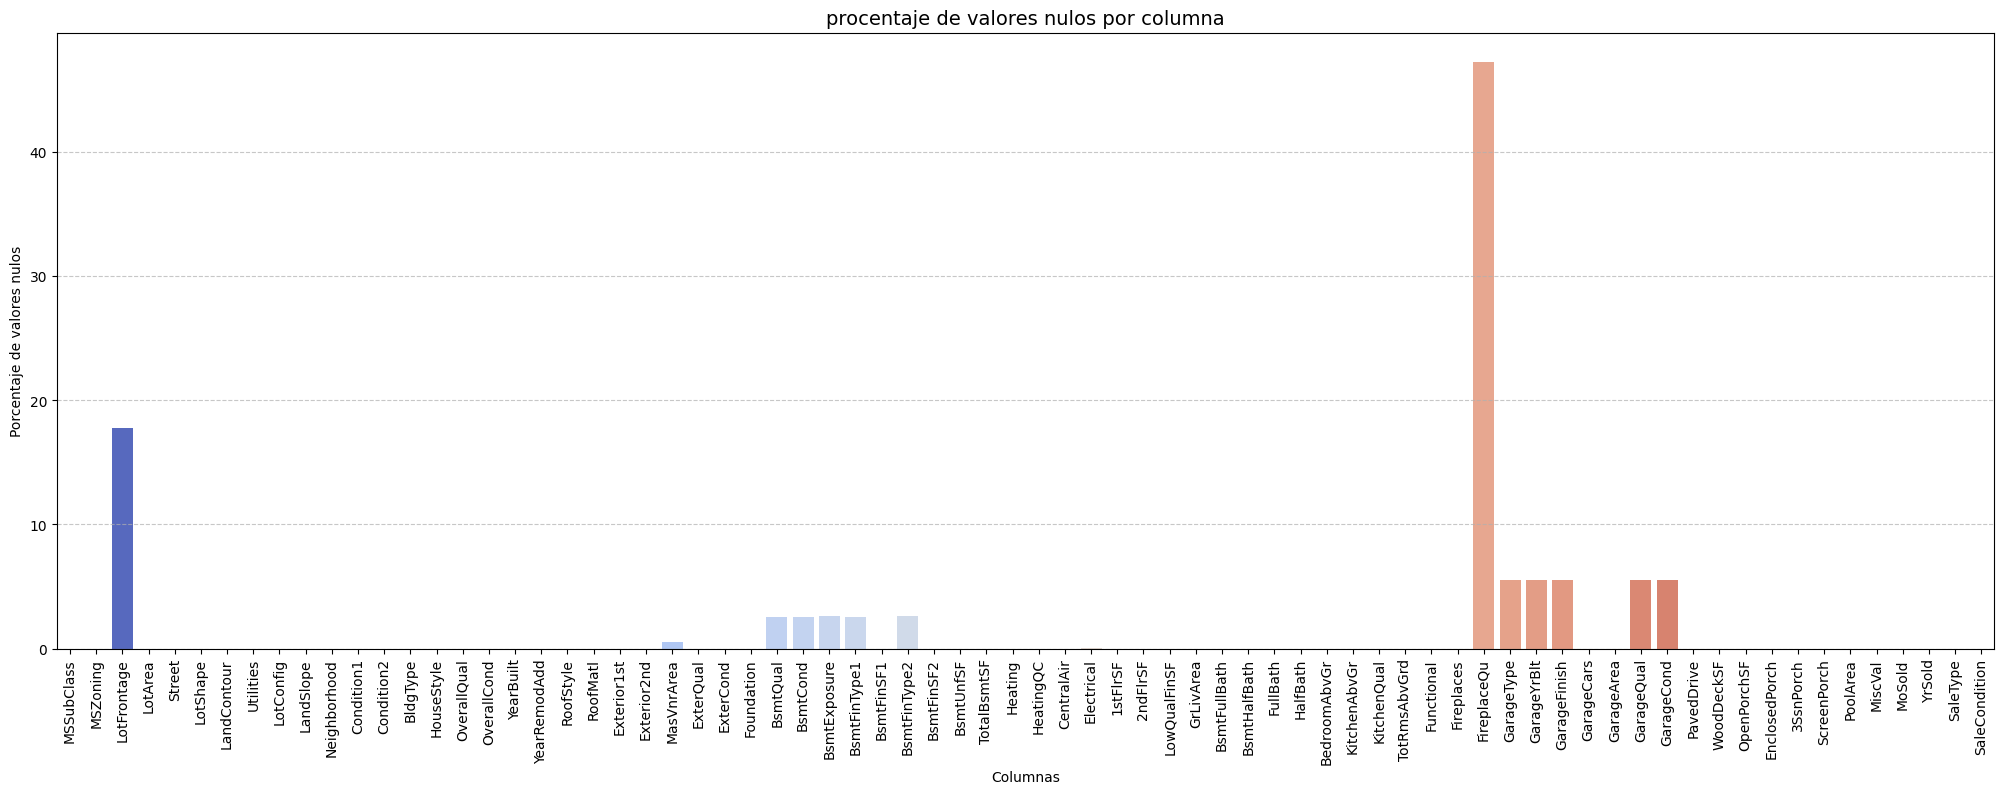

In [3]:

# Despu√©s del an√°islis de nulos se eliminan las variables con 60% de valores nulos.

df = df.drop(columns=["Alley","PoolQC","Fence","MiscFeature","MasVnrType"])

# Calcular el porcentaje de valores nulos otra vez
valores_nulos = (df.isnull().sum() / len(df)) * 100

# Se dan las instrucciones para plotear otravez
plt.figure(figsize=(25,8))
sns.barplot(x=valores_nulos.index,y=valores_nulos.values,palette="coolwarm")
# Personalizar el gr√°fico
plt.title("procentaje de valores nulos por columna", fontsize=14)
plt.xlabel("Columnas")
plt.ylabel("Porcentaje de valores nulos")
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.7)
# Mostrar el gr√°fico
plt.show()


# IMPUTACI√ìN DE DATOS: 

In [4]:
# IMPUTACI√ìN DE DATOS: 

numerical_cols = df.select_dtypes(include=["int64","float64"]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Imputar valores num√©ricos con la mediana
imputer = SimpleImputer(strategy='median')
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])
# Imputar valores categ√≥ricos con la moda
imputer2 = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = imputer2.fit_transform(df[categorical_cols])




valores_nulos = (df.isnull().sum() / len(df)) * 100




In [5]:
#Seleccionar solo variables num√©ricas o categ√≥ricas codificadas (ideal para clustering).

# Grupo de variables num√©ricas: 
numerical_cols = df.select_dtypes(include=["int64","float64"]).columns.tolist()

# Grupo de variables categ√≥ricas: 
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()




df_final_united = pd.concat([df[numerical_cols]], axis=1)
print(df_final_united.describe())


        MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    69.863699   10516.828082     6.099315     5.575342   
std      42.300571    22.027677    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    60.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    79.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.117123   443.639726    46.549315  ...   
std      30.202904     20.645407   180.731373   456.098091   161.319273  ..

#Escalar los datos con StandardScaler o MinMaxScaler.

üìä Resumen de StandardScaler:
      MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0       0.073375    -0.220875 -0.207142     0.651479    -0.517200   1.050994   
1      -0.872563     0.460320 -0.091886    -0.071836     2.179628   0.156734   
2       0.073375    -0.084636  0.073480     0.651479    -0.517200   0.984752   
3       0.309859    -0.447940 -0.096897     0.651479    -0.517200  -1.863632   
4       0.073375     0.641972  0.375148     1.374795    -0.517200   0.951632   
...          ...          ...       ...          ...          ...        ...   
1455    0.073375    -0.357114 -0.260560    -0.071836    -0.517200   0.918511   
1456   -0.872563     0.687385  0.266407    -0.071836     0.381743   0.222975   
1457    0.309859    -0.175462 -0.147810     0.651479     3.078570  -1.002492   
1458   -0.872563    -0.084636 -0.080160    -0.795151     0.381743  -0.704406   
1459   -0.872563     0.233255 -0.058112    -0.795151     0.381743  -0.207594   

      Y

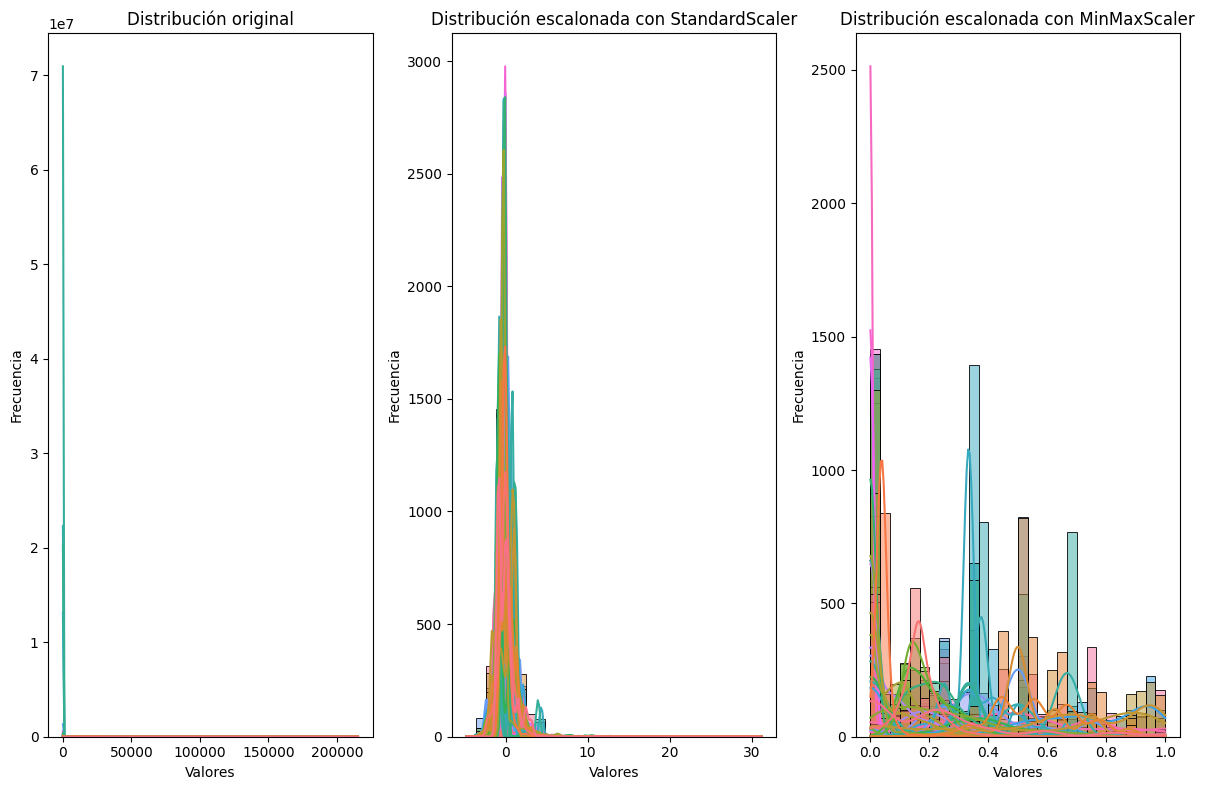

In [6]:
#Escalar los datos con StandardScaler o MinMaxScaler.

scaler = StandardScaler()
scaler_minmax = MinMaxScaler()


datos_escalados_scaler = scaler.fit_transform(df_final_united)
datos_escalados_minmax= scaler_minmax.fit_transform(df_final_united)

df_escalados_scaler = pd.DataFrame(scaler.fit_transform(df_final_united), columns=df_final_united.columns)
df_escalados_min_max = pd.DataFrame(scaler_minmax.fit_transform(df_final_united), columns=df_final_united.columns)
# Ver la diferencia en estad√≠sticas
print("üìä Resumen de StandardScaler:")
print(df_escalados_scaler)

print("\nüìä Resumen de MinMaxScaler:")
print(df_escalados_min_max)




# Graficar Resultados entre los dos escaladores: 

fig, axes = plt.subplots(1, 3, figsize=(12, 8))
sns.histplot(df_final_united, bins=30, ax=axes[0], kde=True, color='skyblue', legend=False)
axes[0].set_title("Distribuci√≥n original")
axes[0].set_xlabel("Valores")
axes[0].set_ylabel("Frecuencia")

sns.histplot(df_escalados_scaler, bins=30, ax=axes[1], kde=True, color='green', legend=False)
axes[1].set_title("Distribuci√≥n escalonada con StandardScaler")
axes[1].set_xlabel("Valores")
axes[1].set_ylabel("Frecuencia")

sns.histplot(df_escalados_min_max, bins=30, ax=axes[2], kde=True, color='red', legend=False)
axes[2].set_title("Distribuci√≥n escalonada con MinMaxScaler")
axes[2].set_xlabel("Valores")
axes[2].set_ylabel("Frecuencia")

 
plt.tight_layout()
plt.show()


- Distribuci√≥n original üìä
- Los valores tienen una gran concentraci√≥n cerca de cero.
- Hay un sesgo fuerte, con una frecuencia alta en los valores peque√±os y una baja en los m√°s grandes.
- StandardScaler üîÑ
- La distribuci√≥n se centra alrededor de 0.
- Los valores se transforman para tener media = 0 y desviaci√≥n est√°ndar = 1.
- Se eliminan efectos de magnitud, pero no altera la forma original completamente.
- MinMaxScaler üìâ
- Los valores se ajustan al rango entre 0 y 1.
- Conserva la estructura de la distribuci√≥n, pero comprime los datos en un intervalo fijo.
- Puede ser √∫til para modelos que requieren datos dentro de un rango espec√≠fico.
Ambos m√©todos tran


**2Ô∏è‚É£ Reducci√≥n de dimensionalidad (opcional pero recomendable)\**

üìä N√∫mero √≥ptimo de componentes scaler: 20
üìä N√∫mero √≥ptimo de componentes minmax: 13


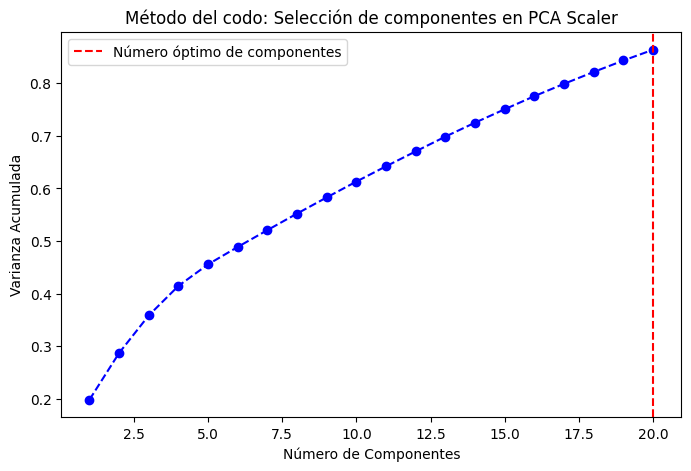

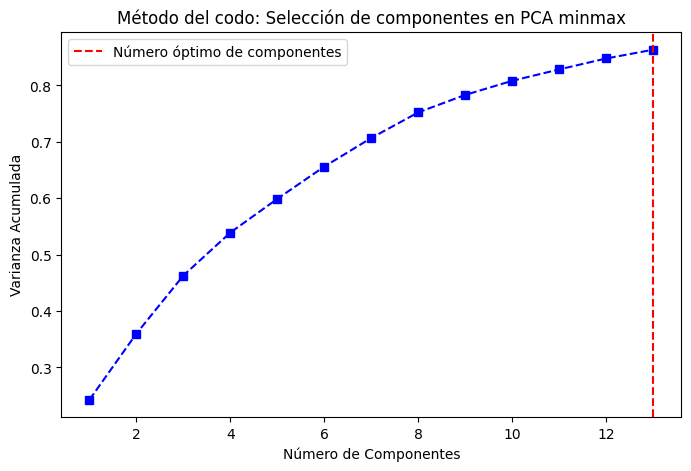

In [7]:
# Se aplica PCA 
from sklearn.decomposition import PCA

# Se llaman las variables del PCA
pca_escalados_scaler = PCA(n_components=20)
pca_escalados_minmax = PCA(n_components=13)
# Se tranforman los datos con PCA.
resultados_pca_scaler = pca_escalados_scaler.fit_transform(df_escalados_scaler)
resultados_pca_minmax = pca_escalados_minmax.fit_transform(df_escalados_min_max)



# Mostrar cu√°ntas componentes explican el 85% de la varianza con Scaler
varianza_acumulada_final_scaler = np.cumsum(pca_escalados_scaler.explained_variance_ratio_)
num_componentes_optimas_scaler = np.argmax(varianza_acumulada_final_scaler  >= 0.85) + 1
print(f"üìä N√∫mero √≥ptimo de componentes scaler: {num_componentes_optimas_scaler}")

# Mostrar cu√°ntas componentes explican el 85% de la varianza con Minmax
varianza_acumulada_final_minmax = np.cumsum(pca_escalados_minmax.explained_variance_ratio_)
num_componentes_optimas_minmax = np.argmax(varianza_acumulada_final_minmax >= 0.85) + 1
print(f"üìä N√∫mero √≥ptimo de componentes minmax: {num_componentes_optimas_minmax}")

# Graficar el Codo con scaler
plt.figure(figsize=(8,5))
plt.plot(range(1,len(varianza_acumulada_final_scaler)+1), varianza_acumulada_final_scaler, marker="o", linestyle="--", color="blue")
plt.xlabel("N√∫mero de Componentes")
plt.ylabel("Varianza Acumulada")
plt.title("M√©todo del codo: Selecci√≥n de componentes en PCA Scaler")
plt.axvline(x=20, color="red", linestyle="--", label="N√∫mero √≥ptimo de componentes")
plt.legend()
plt.show()
# Graficar el Codo con minmax
plt.figure(figsize=(8,5))
plt.plot(range(1,len(varianza_acumulada_final_minmax)+1), varianza_acumulada_final_minmax, marker="s", linestyle="--", color="blue")
plt.xlabel("N√∫mero de Componentes")
plt.ylabel("Varianza Acumulada")
plt.title("M√©todo del codo: Selecci√≥n de componentes en PCA minmax")
plt.axvline(x=13, color="red", linestyle="--", label="N√∫mero √≥ptimo de componentes")
plt.legend()
plt.show()


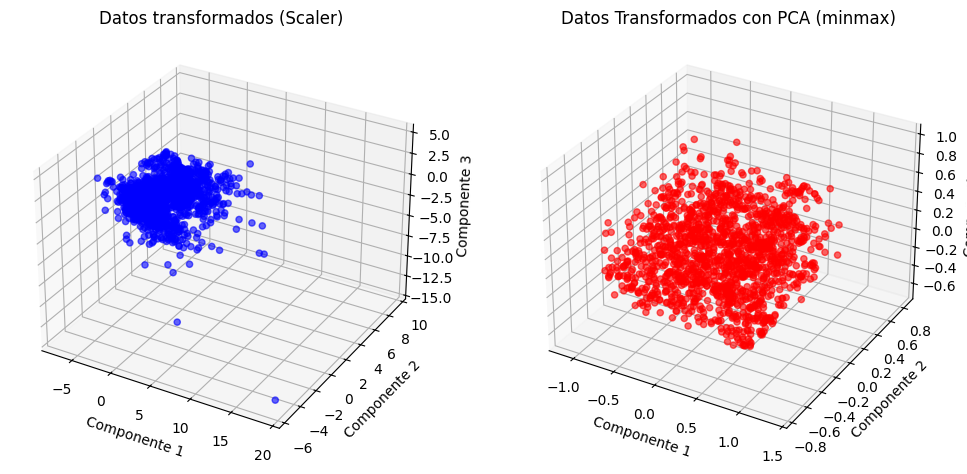

In [8]:
import plotly.express as px  
import pandas as pd  


# Graficar los componentes principales para observar distribuci√≥n y estructura.

fig, axes = plt.subplots(1,2, figsize=(12,6), subplot_kw={"projection":"3d"})



# Antes de PCA: Datos originales escalados

axes[0].scatter(resultados_pca_scaler[:,0], resultados_pca_scaler[:,1], resultados_pca_scaler[:,2], c="blue", alpha=0.6)
axes[0].set_title("Datos transformados (Scaler)")
axes[0].set_xlabel("Componente 1")
axes[0].set_ylabel("Componente 2")
axes[0].set_zlabel("Componente 3")


# Despu√©s de PCA: primeras 3 componentes princiaples.
axes[1].scatter(resultados_pca_minmax[:,0],resultados_pca_minmax[:,1],resultados_pca_minmax[:,2], c="red", alpha=0.6)
axes[1].set_title("Datos Transformados con PCA (minmax)")
axes[1].set_xlabel("Componente 1")
axes[1].set_ylabel("Componente 2")
axes[1].set_zlabel("Componente 3")


fig = px.scatter_3d(df_final_united,  
                     x="LotArea",  
                     y="OverallQual",  
                     z="GrLivArea")  
fig.update_layout(title="Datos Originales (Interactivo)")  
fig.show()   


Se aplica PCA a las variables num√©ricas para reducir la dimensionalidad de los datos.

Se saca la varianza acumulada para saber cu√°l es el n√∫mero √≥ptimo de componentes, en este caso para scalado scaler 20 y minmax 13. Por tanto se utiliza explained_variance_ratio_.



3Ô∏è‚É£ Clustering

Kmeans con escalado SCALER

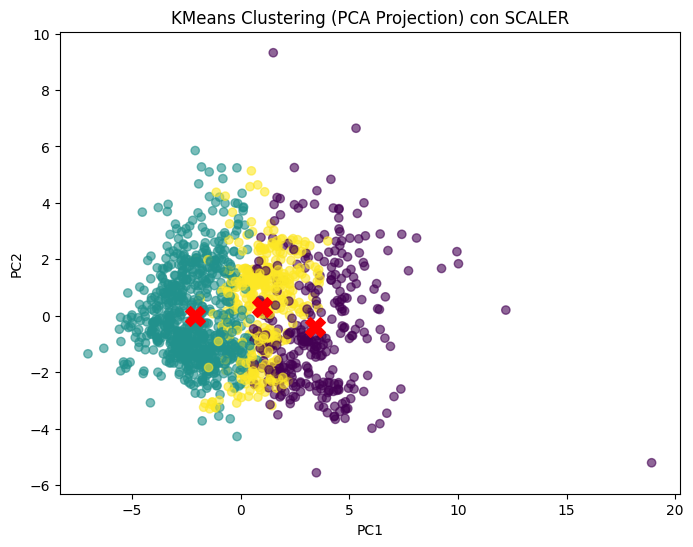

In [9]:
#Aplicar al menos dos t√©cnicas distintas:


#

# Se llama el modelo kmeans para el escalado SCALER
from sklearn.cluster import KMeans
# Se escogen los parametros para kmeans.
kmeans_scaler = KMeans(n_clusters=3,random_state=42)
# Se entrena el modelo.
clusters_kmeans_scaler = kmeans_scaler.fit(resultados_pca_scaler)
etiquetas_kmeans_scaler = kmeans_scaler.labels_ 


# Crear DataFrames con etiquetas de cluster
df_pca_scaler_kmeans = pd.DataFrame(resultados_pca_scaler[:, :3], columns=["PC1", "PC2", "PC3"]) # NO USAR DESPU√âS
df_pca_scaler_kmeans["Cluster_kmeans"] = etiquetas_kmeans_scaler



# Visualizacion de los clusters kmeans usando el resultado de PCA
plt.figure(figsize=(8,6))
plt.scatter(resultados_pca_scaler[:, 0], resultados_pca_scaler[:, 1], c=etiquetas_kmeans_scaler, cmap='viridis', alpha=0.6)
plt.scatter(kmeans_scaler.cluster_centers_[:, 0],kmeans_scaler.cluster_centers_[:, 1], c='red', marker="X",s=200,label="centroides")
plt.title('KMeans Clustering (PCA Projection) con SCALER')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()




Kmeans con escalado MINMAX

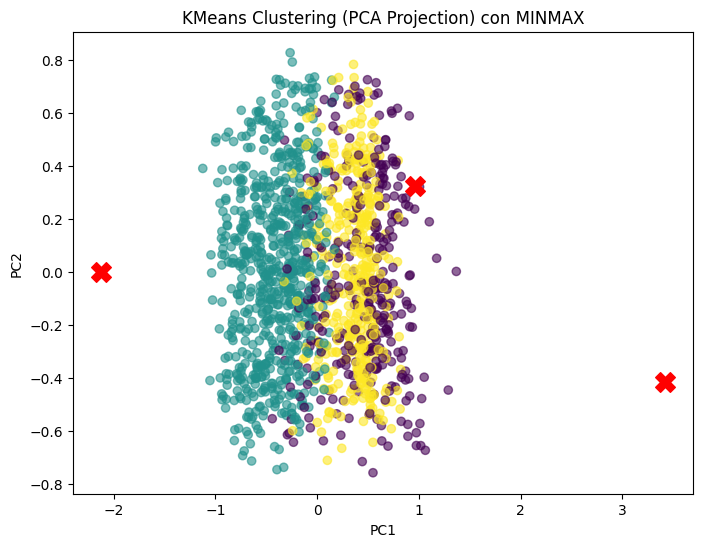

In [10]:
#Aplicar al menos dos t√©cnicas distintas:

# Se llama el modelo kmeans para el escalado MINMAX
from sklearn.cluster import KMeans
# Se escogen los parametros para kmeans.
kmeans_minmax = KMeans(n_clusters=3,random_state=42)
# Se entrena el modelo.
clusters_kmeans_minmax = kmeans_minmax.fit(resultados_pca_scaler)
etiquetas_kmeans_minmax = kmeans_minmax.labels_ 


df_pca_minmax = pd.DataFrame(resultados_pca_minmax[:, :3], columns=["PC1", "PC2", "PC3"])# NO USAR DESPU√âS
df_pca_minmax["Cluster_kmeans_min"] = etiquetas_kmeans_minmax

# Visualizacion de los clusters kmeans usando el resultado de PCA
plt.figure(figsize=(8,6))
plt.scatter(resultados_pca_minmax[:, 0], resultados_pca_minmax[:, 1], c=etiquetas_kmeans_minmax, cmap='viridis', alpha=0.6)
plt.scatter(kmeans_minmax.cluster_centers_[:, 0],kmeans_minmax.cluster_centers_[:, 1], c='red', marker="X",s=200,label="centroides")
plt.title('KMeans Clustering (PCA Projection) con MINMAX')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


4Ô∏è‚É£ Evaluaci√≥n de los cl√∫steres kmeans

Calculamos el Silhouette Score para K-Means  y Davis Boudins. KMEANS

In [11]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
 

# Calculamos el Silhouette Score para K-Means  
silhouette_avg_kmeans_scaler = silhouette_score(resultados_pca_scaler, etiquetas_kmeans_scaler)  
silhouette_avg_kmeans_minmax = silhouette_score(resultados_pca_minmax, etiquetas_kmeans_minmax)  

print(f"Silhouette Score KMeans (Scaler): {silhouette_avg_kmeans_scaler:.3f}")  
print(f"Silhouette Score KMeans (MinMaxScaler): {silhouette_avg_kmeans_minmax:.3f}")  
# Calculamos el Silhouette Score para Davis Boudins.
db_score_scaler = davies_bouldin_score( resultados_pca_scaler, etiquetas_kmeans_scaler)
print(f"Davis Boudin Score (Scaler): {db_score_scaler:.3f}")  
 
db_score_minmax = davies_bouldin_score(resultados_pca_minmax, etiquetas_kmeans_minmax)
print(f"Davis Boudin Score (MinMaxScaler): {db_score_minmax:.3f}") 

Silhouette Score KMeans (Scaler): 0.105
Silhouette Score KMeans (MinMaxScaler): 0.117
Davis Boudin Score (Scaler): 2.517
Davis Boudin Score (MinMaxScaler): 2.925


Datos con DBSCAN y StandardScaler:
         PC1       PC2       PC3  Cluster_DBSCAN
0  1.466021  0.375461  1.698616              -1
1 -0.032837 -1.058352 -1.259901              -1
2  1.652691  0.252552  1.475425              -1
3 -0.368137  1.036425 -0.782022              -1
4  4.411778  1.115727  0.514540              -1

Datos con DBSCAN y MinMaxScaler:
         PC1       PC2       PC3  Cluster_DBSCAN_min
0  0.492427  0.118482  0.208697                   0
1 -0.121454 -0.116552 -0.260003                   0
2  0.535528 -0.036311  0.172966                   0
3 -0.168763 -0.410712  0.016770                   0
4  0.752436 -0.164150  0.267805                   0
Datos con DBSCAN y StandardScaler:
         PC1       PC2       PC3  Cluster_DBSCAN
0  1.466021  0.375461  1.698616              -1
1 -0.032837 -1.058352 -1.259901              -1
2  1.652691  0.252552  1.475425              -1
3 -0.368137  1.036425 -0.782022              -1
4  4.411778  1.115727  0.514540              -1

Dato

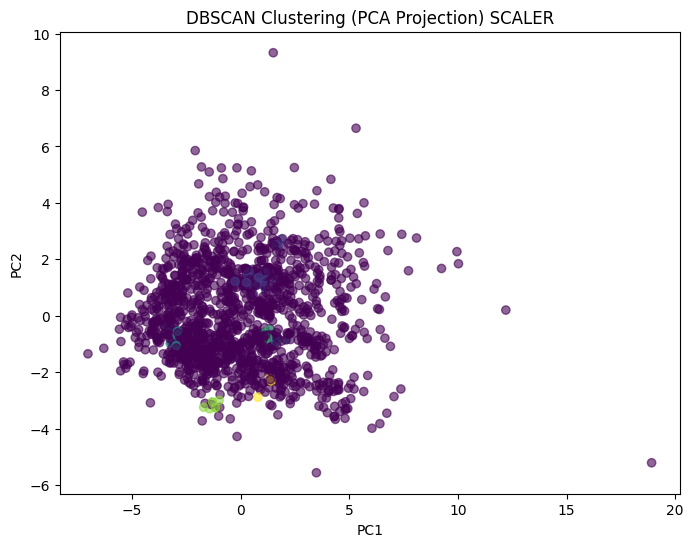

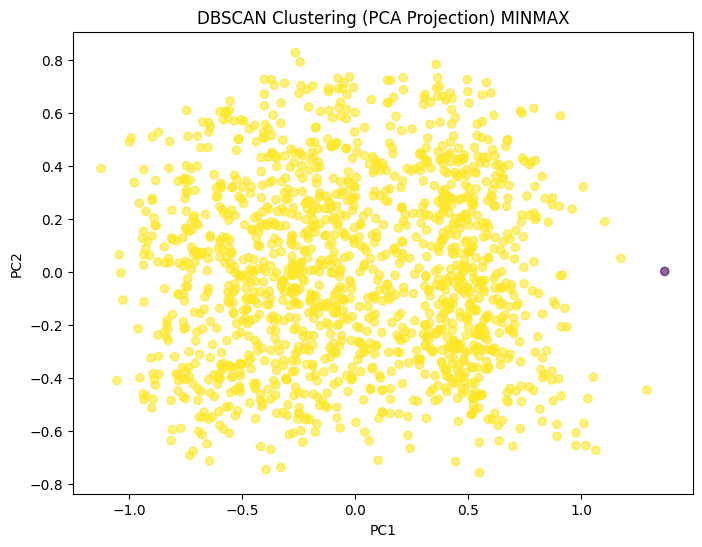

In [12]:
from sklearn.cluster import DBSCAN


# Se aplica el m√©todo DBSCAN para escaler, eps se calcula con nearest neighbors despu√©s
dbscan_housing = DBSCAN(eps=1.5, min_samples=5)
clusters_dbscan_scaler = dbscan_housing.fit_predict(resultados_pca_scaler)


from sklearn.cluster import DBSCAN


# Se aplica el m√©todo DBSCAN para minmax, eps se calcula con nearest neighbors despu√©s
dbscan_housing = DBSCAN(eps=1.1, min_samples=5)
clusters_dbscan_minmax = dbscan_housing.fit_predict(resultados_pca_minmax)


# Se gr√°fica DBSCAN Scaler 3D

# Crear DataFrames con etiquetas de cluster
df_pca_scaler = pd.DataFrame(resultados_pca_scaler[:, :3], columns=["PC1", "PC2", "PC3"]) # NO USAR DESPU√âS
df_pca_scaler["Cluster_DBSCAN"] = clusters_dbscan_scaler

df_pca_minmax = pd.DataFrame(resultados_pca_minmax[:, :3], columns=["PC1", "PC2", "PC3"])# NO USAR DESPU√âS
df_pca_minmax["Cluster_DBSCAN_min"] = clusters_dbscan_minmax

# Mostrar informaci√≥n b√°sica
print("Datos con DBSCAN y StandardScaler:\n", df_pca_scaler.head())
print("\nDatos con DBSCAN y MinMaxScaler:\n", df_pca_minmax.head())


# Mostrar informaci√≥n b√°sica
print("Datos con DBSCAN y StandardScaler:\n", df_pca_scaler.head())
print("\nDatos con DBSCAN y MinMaxScaler:\n", df_pca_minmax.head())

# Se gr√°fica DBSCAN Scaler 2D
plt.figure(figsize=(8,6))
plt.scatter(resultados_pca_scaler[:, 0], resultados_pca_scaler[:, 1], c=clusters_dbscan_scaler, cmap='viridis', alpha=0.6)
plt.title('DBSCAN Clustering (PCA Projection) SCALER')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Se  graf√≠ca DBSCAN minmax
plt.figure(figsize=(8,6))
plt.scatter(resultados_pca_minmax[:, 0], resultados_pca_minmax[:, 1], c=clusters_dbscan_minmax, cmap='viridis', alpha=0.6)
plt.title('DBSCAN Clustering (PCA Projection) MINMAX')
plt.xlabel('PC1')
plt.ylabel('PC2')




# Gr√°fico DBSCAN con StandardScaler
fig_scaler = px.scatter_3d(df_pca_scaler, x="PC1", y="PC2", z="PC3",  
                           color="Cluster_DBSCAN", opacity=0.7,  
                           color_continuous_scale="viridis")  
fig_scaler.update_layout(title="DBSCAN en PCA 3D con StandardScaler")  
fig_scaler.show()  

# Gr√°fico DBSCAN con MinMaxScaler
fig_minmax = px.scatter_3d(df_pca_minmax, x="PC1", y="PC2", z="PC3",  
                           color="Cluster_DBSCAN_min", opacity=0.7,  
                           color_continuous_scale="viridis")  
fig_minmax.update_layout(title="DBSCAN en PCA 3D con MinMaxScaler")  
fig_minmax.show()  





# Utilizamos  NearestNeighbors para saber la distancia m√°s adecuada.

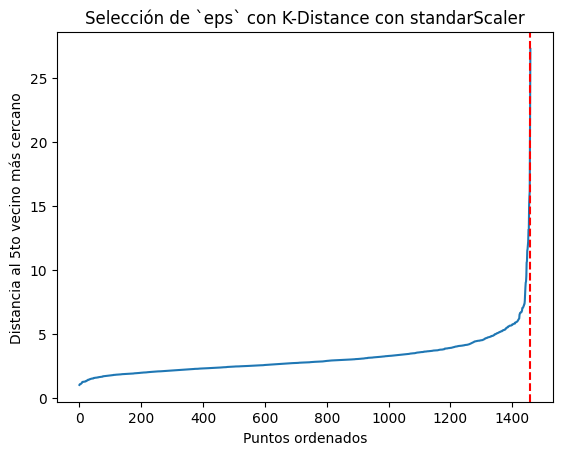

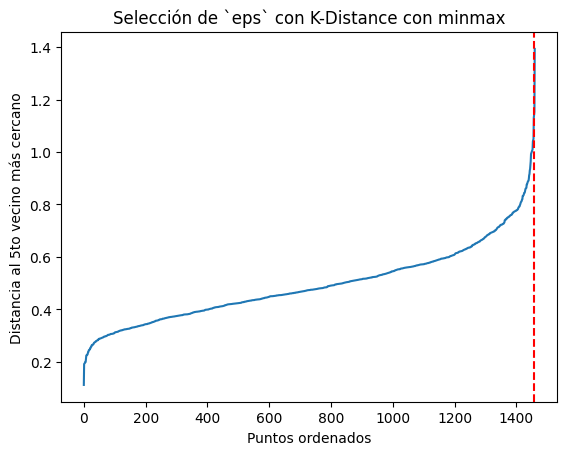

Eps √≥ptimo (Scaler): 21.669
Eps √≥ptimo (MinMaxScaler): 1.153


In [13]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

vecinos_scaler = NearestNeighbors(n_neighbors=5, metric='euclidean')  # N√∫mero de vecinos y m√©trica de distancia
vecinos_scaler.fit(resultados_pca_scaler)  # Aplicar a los datos
distancias_scaler, indices_scaler = vecinos_scaler.kneighbors(resultados_pca_scaler)

vecinos_minmax = NearestNeighbors(n_neighbors=5, metric='euclidean')  # N√∫mero de vecinos y m√©trica de distancia
vecinos_minmax.fit(resultados_pca_minmax)  # Aplicar a los datos
distancias_minmax, indices_minmax = vecinos_minmax.kneighbors(resultados_pca_minmax)


# Encontrar el √≠ndice del punto √≥ptimo (aproximaci√≥n visual)
distancias_scaler_ordenadas = np.sort(distancias_scaler[:, -1]) 
punto_optimo_idx = np.argmax(np.diff(distancias_scaler_ordenadas))



import numpy as np  
import matplotlib.pyplot as plt  

# Ordenar las distancias para visualizar la curva  
distancias_scaler_ordenadas = np.sort(distancias_scaler[:, -1])  # √öltima distancia (5¬∫ vecino)  
distancias_minmax_ordenadas = np.sort(distancias_minmax[:, -1])
# Encontrar el √≠ndice del punto √≥ptimo (aproximaci√≥n visual)
punto_optimo_idx_scaler = np.argmax(np.diff(distancias_scaler_ordenadas))  # Mayor cambio en la pendiente  
punto_optimo_valor_scaler = distancias_scaler_ordenadas[punto_optimo_idx]  

punto_optimo_idx_minmax = np.argmax(np.diff(distancias_minmax_ordenadas))  # Mayor cambio en la pendiente  
punto_optimo_valor_minmax = distancias_minmax_ordenadas[punto_optimo_idx_minmax] 



# Graficamos la curva para encontrar el "codo" para SCALER
distancias_scaler = np.sort(distancias_scaler[:, -1], axis=0)
plt.plot(distancias_scaler)
plt.xlabel("Puntos ordenados")
plt.ylabel("Distancia al 5to vecino m√°s cercano")
plt.axvline(x=punto_optimo_idx_scaler, color='red', linestyle='--', label=f"Punto √≥ptimo ({punto_optimo_valor_scaler:.2f})")
plt.title("Selecci√≥n de `eps` con K-Distance con standarScaler")
plt.show()


# Graficamos la curva para encontrar el "codo" para MINMAX
distancias_minmax = np.sort(distancias_minmax[:, -1], axis=0)
plt.plot(distancias_minmax)
plt.xlabel("Puntos ordenados")
plt.ylabel("Distancia al 5to vecino m√°s cercano")
plt.axvline(x=punto_optimo_idx_minmax, color='red', linestyle='--', label=f"Punto √≥ptimo ({punto_optimo_valor_minmax:.2f})")
plt.title("Selecci√≥n de `eps` con K-Distance con minmax")
plt.show()

eps_optimo_scaler = distancias_scaler_ordenadas[punto_optimo_idx_scaler]
eps_optimo_minmax = distancias_minmax_ordenadas[punto_optimo_idx_minmax]
print(f"Eps √≥ptimo (Scaler): {eps_optimo_scaler:.3f}")
print(f"Eps √≥ptimo (MinMaxScaler): {eps_optimo_minmax:.3f}")


4Ô∏è‚É£ Evaluaci√≥n de los cl√∫steres DBSCAN

# Calculamos el Silhouette Score Y Davis Boudin para DBSCAN

In [14]:
# Calculamos el Silhouette Score para K-Means  
from sklearn.metrics import silhouette_score
import numpy as np

import pandas as pd

# Filtrar solo los puntos que NO son ruido (-1)
df_limpio_scaler = df_pca_scaler[df_pca_scaler["Cluster_DBSCAN"] != -1]
df_limpio_minmax = df_pca_minmax[df_pca_minmax["Cluster_DBSCAN_min"] != -1]

num_clusters_minmax = len(set(clusters_dbscan_minmax))

if num_clusters_minmax > 1: 
 print(num_clusters_minmax)
else:
 print("DBSCAN escalado con MINMAX solo tiene un cluster no se puede medir el silhouette ni el Davis Boudin")

# Calcular Silhouette Score solo para puntos con cluster asignado
silhouette_avg_dbscan_scaler = silhouette_score(df_limpio_scaler.iloc[:, :-1], df_limpio_scaler["Cluster_DBSCAN"])
silhouette_avg_dbscan_minmax = silhouette_score(resultados_pca_minmax, clusters_dbscan_minmax)

print(f"Silhouette Score DBSCAN (Scaler): {silhouette_avg_dbscan_scaler:.3f}")
print(f"Silhouette Score DBSCAN (MinMaxScaler): {silhouette_avg_dbscan_minmax:.3f}")


# Calculamos el Silhouette Score para Davis Boudins.
db_score_scaler = davies_bouldin_score( resultados_pca_scaler, clusters_dbscan_scaler)
print(f"Davis Boudin Score DBSCAN (Scaler): {db_score_scaler:.3f}")  
print(f"Davis Boudin Score DBSCAN (MinMaxScaler): {db_score_minmax:.3f}") 


2
Silhouette Score DBSCAN (Scaler): 0.640
Silhouette Score DBSCAN (MinMaxScaler): 0.450
Davis Boudin Score DBSCAN (Scaler): 1.657
Davis Boudin Score DBSCAN (MinMaxScaler): 2.925


In [15]:
# Se trae AgglomeraticeClustering y cluster.hierarchy
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch


# Se llama el modelo agglomerative para SCALER
agg_clustering_scaler = AgglomerativeClustering(n_clusters=4, linkage="ward")
clusters_agg_scaler = agg_clustering_scaler.fit_predict(resultados_pca_scaler)

# Se llama el modelo agglomerative para MINMAX
agg_clustering_minmax = AgglomerativeClustering(n_clusters=2, linkage="ward")
clusters_agg_minmax = agg_clustering_minmax.fit_predict(resultados_pca_minmax)


# Crear DataFrames con etiquetas de cluster
df_pca_scaler_agglomerative = pd.DataFrame(resultados_pca_scaler[:, :3], columns=["PC1", "PC2", "PC3"]) # NO USAR DESPU√âS
df_pca_scaler_agglomerative["Cluster_agglomerative"] = clusters_agg_scaler

df_pca_minmax_agglomerative = pd.DataFrame(resultados_pca_minmax[:, :3], columns=["PC1", "PC2", "PC3"])# NO USAR DESPU√âS
df_pca_minmax_agglomerative["Cluster_agglomerative_min"] = clusters_agg_minmax


# Se grafica en 3D el gr√°fico de Agglomerative Clustering

fig = px.scatter_3d(df_pca_scaler_agglomerative,x="PC1",y="PC2",z="PC3",
                    color="Cluster_agglomerative", opacity=0.7,
                    color_continuous_scale="viridis")

fig.update_layout(title="Clustering con Agglomerative Clustering en PCA 3D - Interactivo - scaler")
fig.show()

# Se grafica en 3D el gr√°fico de Agglomerative Clustering

fig = px.scatter_3d(df_pca_minmax_agglomerative,x="PC1",y="PC2",z="PC3",
                    color="Cluster_agglomerative_min", opacity=0.7,
                    color_continuous_scale="viridis")

fig.update_layout(title="Clustering con Agglomerative Clustering en PCA 3D - Interactivo - minmax")
fig.show()




Dendograma para scaler. Saber el n√∫mero √≥timo de clusters.

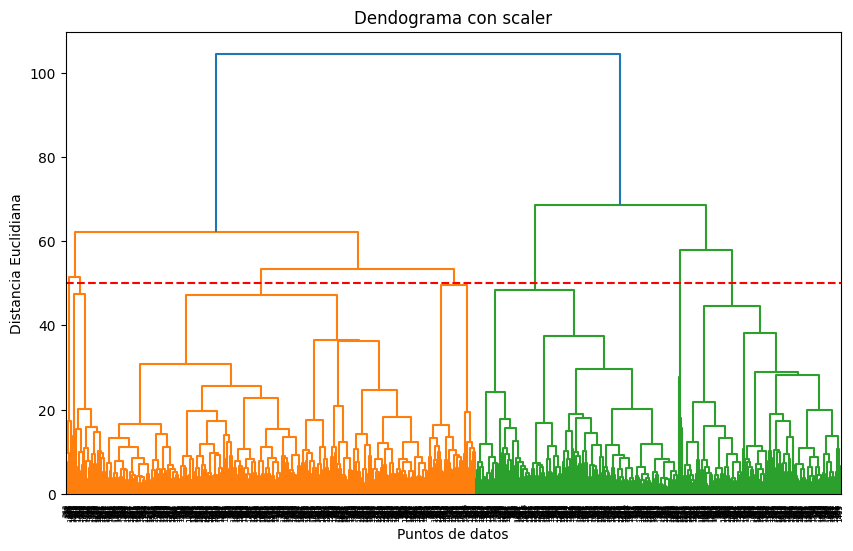

In [16]:
# Se construye el dendograma con el m√©todo "Ward" todos los datos

plt.figure(figsize=(10,6))

dendogram = sch.dendrogram(sch.linkage(resultados_pca_scaler, method="ward"))
plt.title("Dendograma con scaler")
plt.xlabel("Puntos de datos")
plt.ylabel("Distancia Euclidiana")
plt.axhline(y=50, color='r', linestyle='--', label='Corte √≥ptimo')
plt.show()



Dendograma para minmax. Saber el n√∫mero √≥timo de clusters.

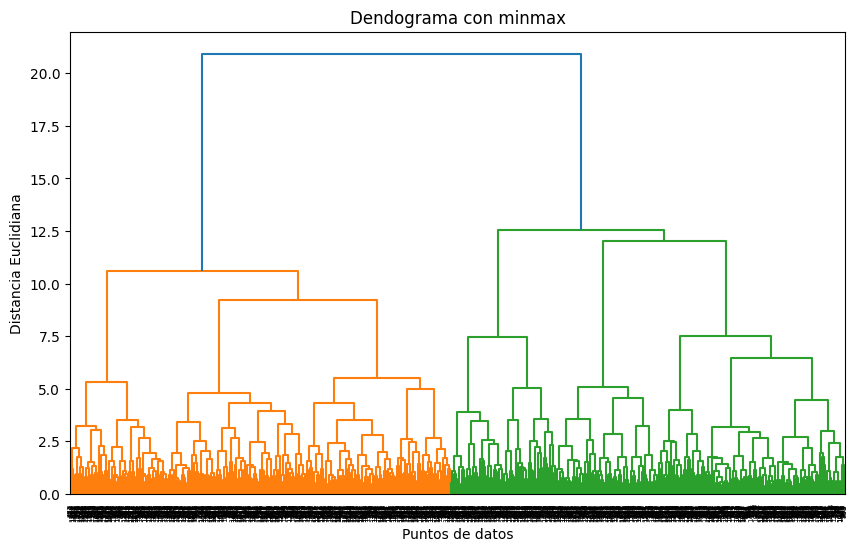

In [17]:
# Se hace el gr√°fico scaler
plt.figure(figsize=(10,6))

dendogram = sch.dendrogram(sch.linkage(resultados_pca_minmax, method="ward"))
plt.title("Dendograma con minmax")
plt.xlabel("Puntos de datos")
plt.ylabel("Distancia Euclidiana")
plt.axhline(y=50, color='r', linestyle='--', label='Corte √≥ptimo')
plt.show()

4Ô∏è‚É£ Evaluaci√≥n de los cl√∫steres AGGLOMERATIVE
# Calculamos el Silhouette Score y Davis Boudin para Agglomerative  

In [18]:
# Calculamos el Silhouette Score para Agglomerative  
from sklearn.metrics import silhouette_score
import numpy as np


# Calcular Silhouette Score para Agglomerative scaler y minmax
silhouette_avg_agglomerative_scaler = silhouette_score(resultados_pca_scaler, clusters_agg_scaler)
silhouette_avg_agglomerative_minmax = silhouette_score(resultados_pca_minmax, clusters_agg_minmax)

print(f"Silhouette Score Agglomerative (Scaler): {silhouette_avg_agglomerative_scaler:.3f}")
print(f"Silhouette Score Agglomerative (MinMaxScaler): {silhouette_avg_agglomerative_minmax:.3f}")


# Calculamos el Davis Boudin Score para Agglomerative scaler y minmax
db_score_scaler = davies_bouldin_score( resultados_pca_scaler, clusters_agg_scaler)
print(f"Davis Boudin Score Agglomerative(Scaler): {db_score_scaler:.3f}")  
 
db_score_minmax = davies_bouldin_score(resultados_pca_minmax, clusters_agg_minmax)
print(f"Davis Boudin Score Agglomerative (MinMaxScaler): {db_score_minmax:.3f}") 

Silhouette Score Agglomerative (Scaler): 0.136
Silhouette Score Agglomerative (MinMaxScaler): 0.170
Davis Boudin Score Agglomerative(Scaler): 2.193
Davis Boudin Score Agglomerative (MinMaxScaler): 2.097


# Analizar las caracter√≠sticas promedio por cl√∫ster (df.groupby('cluster').mean()).




In [19]:
#  elimina las columnas de clustering previas si existen
columnas_cluster = ["Cluster_DBSCAN", "Cluster_DBSCAN_min", "Cluster_Agglomerative", "Cluster_agglomerative_min", 
                     "Cluster_kmeans", "Cluster_kmeans_min"]
df_final_united.drop(columns=columnas_cluster, errors="ignore", inplace=True)


df_final_united["Cluster_kmeans"] = etiquetas_kmeans_scaler
promedios_kmeans_scaler = df_final_united.groupby("Cluster_kmeans").mean()
print("\nPromedio por cl√∫ster - minmax (StandardScaler):")
print(promedios_kmeans_scaler.T)

# üîπ elimina las columnas de clustering previas si existen
columnas_cluster = ["Cluster_DBSCAN", "Cluster_DBSCAN_min", "Cluster_Agglomerative", "Cluster_agglomerative_min", 
                     "Cluster_kmeans", "Cluster_kmeans_min"]
df_final_united.drop(columns=columnas_cluster, errors="ignore", inplace=True)

df_final_united["Cluster_kmeans_min"] = etiquetas_kmeans_minmax
promedios_kmeans_min = df_final_united.groupby("Cluster_kmeans_min").mean()
print("\nPromedio por cl√∫ster kmeans - (minmax):")
print(promedios_kmeans_min.T)

# üîπ elimina las columnas de clustering previas si existen
columnas_cluster = ["Cluster_DBSCAN", "Cluster_DBSCAN_min", "Cluster_Agglomerative", "Cluster_agglomerative_min", 
                     "Cluster_kmeans", "Cluster_kmeans_min"]
df_final_united.drop(columns=columnas_cluster, errors="ignore", inplace=True)


# DBSCAN con StandardScaler
df_final_united["Cluster_DBSCAN"] = clusters_dbscan_scaler
promedios_dbscan_scaler = df_final_united.groupby("Cluster_DBSCAN").mean().round(3)
print("\nPromedio por cl√∫ster - DBSCAN (StandardScaler):")
print(promedios_dbscan_scaler.T)

# üîπelimina las columnas de clustering previas si existen
columnas_cluster = ["Cluster_DBSCAN", "Cluster_DBSCAN_min", "Cluster_Agglomerative", "Cluster_agglomerative_min", 
                     "Cluster_kmeans", "Cluster_kmeans_min"]
df_final_united.drop(columns=columnas_cluster, errors="ignore", inplace=True)

# DBSCAN con minmax
df_final_united["Cluster_DBSCAN_min"] = clusters_dbscan_minmax
promedios_dbscan_min = df_final_united.groupby("Cluster_DBSCAN_min").mean()
print("\nPromedio por cl√∫ster - DBSCAN (minmax):")
print(promedios_dbscan_min.T)

# üîπ Primero, elimina las columnas de clustering previas si existen
columnas_cluster = ["Cluster_DBSCAN", "Cluster_DBSCAN_min", "Cluster_Agglomerative", "Cluster_agglomerative_min", 
                     "Cluster_kmeans", "Cluster_kmeans_min"]
df_final_united.drop(columns=columnas_cluster, errors="ignore", inplace=True)

# Agglomerative Clustering con StandardScaler
df_final_united["Cluster_Agglomerative"] = clusters_agg_scaler
promedios_agglomerative_scaler = df_final_united.groupby("Cluster_Agglomerative").mean()
print("\nPromedio por cl√∫ster - Agglomerative Clustering (StandardScaler):")
print(promedios_agglomerative_scaler.T)


# üîπ Primero, elimina las columnas de clustering previas si existen
columnas_cluster = ["Cluster_DBSCAN", "Cluster_DBSCAN_min", "Cluster_Agglomerative", "Cluster_agglomerative_min", 
                     "Cluster_kmeans", "Cluster_kmeans_min"]
df_final_united.drop(columns=columnas_cluster, errors="ignore", inplace=True)

# Agglomerative Clustering con minmax
df_final_united["Cluster_agglomerative_min"] = clusters_agg_minmax
promedios_agglomerative_min = df_final_united.groupby("Cluster_agglomerative_min").mean()
print("\nPromedio por cl√∫ster - Agglomerative Clustering (minmax):")
print(promedios_agglomerative_min.T)





Promedio por cl√∫ster - minmax (StandardScaler):
Cluster_kmeans             0            1            2
MSSubClass         43.343558    51.566434    76.539379
LotFrontage        84.800613    65.973427    64.880668
LotArea         15805.220859  9116.145455  8792.417661
OverallQual         7.426380     5.158042     6.673031
OverallCond         5.306748     5.917483     5.200477
YearBuilt        1988.598160  1949.774825  1994.460621
YearRemodAdd     1995.831288  1972.479720  1997.470167
MasVnrArea        249.947853    44.306294    89.233890
BsmtFinSF1        750.343558   364.934266   339.317422
BsmtFinSF2         55.331288    56.881119    22.085919
BsmtUnfSF         774.990798   445.965035   612.551313
TotalBsmtSF      1580.665644   867.780420   973.954654
1stFlrSF         1657.006135  1001.165035  1053.503580
2ndFlrSF          385.162577   209.455944   551.992840
LowQualFinSF        8.401840     7.767832     0.572792
GrLivArea        2050.570552  1218.388811  1606.069212
BsmtFullBath   

En gerneral el an√°lisis de cada grupo depende del n√∫mero de clusters. Sin embargo para un an√°lisis se toma agglomerative
clustering con standard scaler: 

‚úÖ Cluster 0: Casas modernas con alta calidad de construcci√≥n (OverallQual: 7.2), lotes amplios (LotArea: 13,244) y espacios generosos en el s√≥tano y planta baja. Estas viviendas fueron construidas mayormente despu√©s de 1996, lo que indica una mejor conservaci√≥n y dise√±o actualizado.

‚úÖ Cluster 1: Casas m√°s antiguas (A√±o construcci√≥n: 1954), con tama√±o moderado y menor inversi√≥n en mejoras recientes. Tienden a tener menor √°rea de s√≥tano y calidad de construcci√≥n intermedia (OverallQual: 5.2), lo que sugiere que podr√≠an necesitar renovaciones para mejorar su habitabilidad.

‚úÖ Cluster 2: Viviendas recientes y de mejor calidad (OverallQual: 6.8), con mayor espacio habitable en la segunda planta (2ndFlrSF: 880). Estas propiedades han tenido remodelaciones recientes y ofrecen un equilibrio entre comodidad y dise√±o eficiente.


‚úÖ Cluster 3: Casas m√°s antiguas a√∫n (A√±o construcci√≥n: 1946), con tama√±o de lote m√°s peque√±o y calidad de construcci√≥n m√°s baja (OverallQual: 5). Son propiedades que podr√≠an requerir mantenimiento significativo para modernizarlas y aumentar su valor en el mercado.


Resumen de Cl√∫sters:

üîπ Cl√∫ster 3 ‚Üí Viviendas de alta gama, probablemente las m√°s costosas, con materiales de alta calidad y excelente ubicaci√≥n.

üîπ Cl√∫ster 1 ‚Üí Propiedades de buena calidad con precios altos, pero no los m√°s exclusivos. Representan una opci√≥n equilibrada entre lujo y accesibilidad.

üîπ Cl√∫ster 2 ‚Üí Segmento intermedio, con calidad media y precios variables dependiendo de ubicaci√≥n y caracter√≠sticas espec√≠ficas.

üîπ Cl√∫ster 0 ‚Üí Opci√≥n m√°s econ√≥mica, ideal para compradores con menor presupuesto, pero con potencial de mejoras y valorizaci√≥n.












5Ô∏è‚É£ Conclusi√≥n reflexiva

5Ô∏è‚É£ Conclusi√≥n reflexiva
¬øQu√© variables parecen diferenciar m√°s a los grupos?



‚úÖ 1Ô∏è‚É£ OverallQual & OverallCond ‚Üí La calidad y condici√≥n general del inmueble afectan su valoraci√≥n y la percepci√≥n de los compradores.

‚úÖ 2Ô∏è‚É£ GrLivArea & TotalBsmtSF ‚Üí La superficie habitable y el tama√±o del s√≥tano determinan el espacio disponible, influyendo en el precio de venta.

‚úÖ 3Ô∏è‚É£ GarageCars & GarageArea ‚Üí La cantidad de espacios para autos y el √°rea total del garaje son factores diferenciadores importantes.

‚úÖ 4Ô∏è‚É£ YearBuilt & YearRemodAdd ‚Üí La antig√ºedad de la vivienda y las remodelaciones pueden influir en su atractivo y precio de mercado.

‚úÖ 5Ô∏è‚É£ Neighborhood & LotArea ‚Üí La ubicaci√≥n y el tama√±o del lote juegan un papel clave en la categorizaci√≥n de las propiedades.




¬øQu√© utilidad podr√≠a tener este an√°lisis para un negocio o investigaci√≥n?

üìä Negocios inmobiliarios ‚Üí Permite segmentar propiedades seg√∫n caracter√≠sticas clave, ayudando a definir estrategias de precios y posicionamiento de mercado. Una empresa inmobiliaria podr√≠a adaptar su oferta seg√∫n las preferencias de cada grupo de compradores.

üí∞ Inversi√≥n y valoraci√≥n ‚Üí Los inversionistas pueden identificar clusters con propiedades de bajo precio pero con potencial de mejora. Analizar estos segmentos ayuda a tomar decisiones sobre remodelaciones y estrategias de valorizaci√≥n.

üìà Optimizaci√≥n de marketing ‚Üí Se pueden dise√±ar campa√±as dirigidas a clientes espec√≠ficos. Por ejemplo, quienes buscan viviendas premium recibir√≠an anuncios diferentes a los compradores enfocados en oportunidades econ√≥micas.

üî¨ Investigaci√≥n urban√≠stica ‚Üí Facilita el estudio de patrones en la distribuci√≥n de viviendas seg√∫n calidad, ubicaci√≥n y estructura, proporcionando informaci√≥n √∫til para planificaci√≥n urbana y pol√≠ticas de desarrollo


¬øQu√© limitaciones tiene este enfoque frente al aprendizaje supervisado?


Aunque el clustering es una herramienta poderosa para segmentar datos sin etiquetas, tiene varias limitaciones en comparaci√≥n con el aprendizaje supervisado:

üîπ Falta de un objetivo espec√≠fico ‚Üí A diferencia de los modelos supervisados, el clustering no tiene una variable objetivo clara. En problemas de predicci√≥n de precios, por ejemplo, un modelo supervisado como regresi√≥n lineal o XGBoost podr√≠a proporcionar estimaciones m√°s precisas.

üîπ Definici√≥n subjetiva de la calidad del clustering ‚Üí La interpretaci√≥n de los grupos depende de m√©tricas como Silhouette Score o Davies-Bouldin Score, pero la validaci√≥n de los clusters puede ser menos clara que la precisi√≥n en modelos supervisados.

üîπ Menor capacidad para prever valores nuevos ‚Üí Mientras que el aprendizaje supervisado entrena sobre ejemplos etiquetados y puede hacer predicciones sobre datos futuros, el clustering solo agrupa los datos existentes sin generar estimaciones directas.


¬øQu√© podr√≠as mejorar en un segundo intento?

- Al realizar el an√°lisis de una manera detallada y utilizando MinMaxScaler y StandarScaler, y ver su respuesta en cada modelo. Se debe ser muy riguroso y ordenado para des√∫es no perder tiempo. 

- Para un pr√≥ximo modelo se tendr√°n bases m√°s claras y el aprendizaje de este taller para tener mejores resultados.

